In [6]:
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob

from extract.jobs import parse_mallob, get_baseline

In [7]:
# Parse a cnc log
pd.DataFrame(parse_mallob("logs/all (prune)/"))

,identifier,start_time,end_time,duration,result,start_generate_cubes,end_generate_cubes,root_node,number_send_cubes,number_returned_cubes
0,1,1.220,530.212,528.992,UNSAT,1.3357,1.47324,7,160,40
1,2,1.387,1001.409,1000.022,UNKNOWN,1.5396,38.2273,2,60,1
2,3,2.672,1002.756,1000.084,UNKNOWN,2.89331,535.579,5,31,10
3,4,2.793,40.392,37.599,SAT,2.88302,14.898,13,60,2
4,5,40.392,1040.403,1000.011,UNKNOWN,40.4751,40.657,14,84,3
...,...,...,...,...,...,...,...,...,...,...
347,348,54983.980,55984.000,1000.020,UNKNOWN,54984.1,54987.3,13,64,6
348,349,55127.164,55131.801,4.637,SAT,55127.3,55131.9,10,0,0
349,350,55131.801,56131.816,1000.015,UNKNOWN,55131.9,55133.5,7,68,2
350,351,55346.621,56346.645,1000.024,UNKNOWN,55346.7,55387.9,23,124,5


In [8]:
# Parse a thread log
pd.DataFrame(parse_mallob("logs/log (mallob baseline)/"))

,identifier,start_time,end_time,duration,result,start_generate_cubes,end_generate_cubes,root_node,number_send_cubes,number_returned_cubes
0,1,4.032,157.949,153.917,UNSAT,NONE,NONE,NONE,0,0
1,2,5.128,793.565,788.437,SAT,NONE,NONE,NONE,0,0
2,3,6.494,1006.566,1000.072,UNKNOWN,NONE,NONE,NONE,0,0
3,4,6.642,104.454,97.812,SAT,NONE,NONE,NONE,0,0
4,5,104.455,1104.469,1000.014,UNKNOWN,NONE,NONE,NONE,0,0
...,...,...,...,...,...,...,...,...,...,...
347,348,47703.707,48703.719,1000.012,UNKNOWN,NONE,NONE,NONE,0,0
348,349,47786.410,47806.688,20.278,SAT,NONE,NONE,NONE,0,0
349,350,47806.688,47918.492,111.804,UNSAT,NONE,NONE,NONE,0,0
350,351,47918.492,48918.516,1000.024,UNKNOWN,NONE,NONE,NONE,0,0


In [9]:
# Parse baseline
pd.DataFrame(get_baseline())

,identifier,start_time,end_time,duration,result,start_generate_cubes,end_generate_cubes,root_node,number_send_cubes,number_returned_cubes
0,1,-1.0,-1.0,388.0,UNSATISFIABLE,NONE,NONE,NONE,0,0
1,2,-1.0,-1.0,341.0,SATISFIABLE,NONE,NONE,NONE,0,0
2,3,-1.0,-1.0,1000.0,UNKNOWN,NONE,NONE,NONE,0,0
3,4,-1.0,-1.0,13.0,SATISFIABLE,NONE,NONE,NONE,0,0
4,5,-1.0,-1.0,1000.0,UNKNOWN,NONE,NONE,NONE,0,0
...,...,...,...,...,...,...,...,...,...,...
347,348,-1.0,-1.0,1000.0,UNKNOWN,NONE,NONE,NONE,0,0
348,349,-1.0,-1.0,0.0,SATISFIABLE,NONE,NONE,NONE,0,0
349,350,-1.0,-1.0,1000.0,UNKNOWN,NONE,NONE,NONE,0,0
350,351,-1.0,-1.0,1001.0,UNKNOWN,NONE,NONE,NONE,0,0


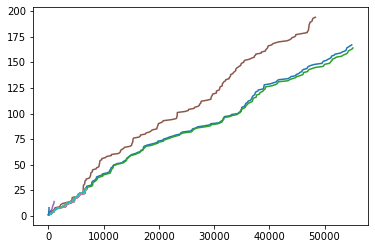

In [10]:
# Parse all mallob logs and plot them
logdirs = glob("logs/*/")

for logdir in logdirs:

    # Parse -> to DataFrame
    job_df = pd.DataFrame(parse_mallob(logdir))

    # Filter UNKNOWN
    solved = job_df[job_df.result != "UNKNOWN"]

    # Sort end_time ascending
    end_times = solved.sort_values(by=['end_time']).end_time

    # Plot end_time of solved formulas
    plt.plot(end_times, range(1, len(end_times) + 1))

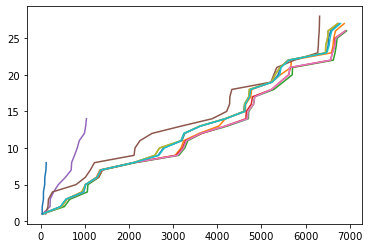

In [11]:
# Parse all mallob logs and plot them only for the first 50 instances
logdirs = glob("logs/*/")

for logdir in logdirs:

    # Parse -> to DataFrame
    job_df = pd.DataFrame(parse_mallob(logdir)).head(50)

    # Filter UNKNOWN
    solved = job_df[job_df.result != "UNKNOWN"]

    # Sort end_time ascending
    end_times = solved.sort_values(by=['end_time']).end_time

    # Plot end_time of solved formulas
    plt.plot(end_times, range(1, len(end_times) + 1))

In [12]:
baseline_df = pd.DataFrame(get_baseline())
baseline_result = baseline_df.result.rename("baseline_result")

thread_df = pd.DataFrame(parse_mallob("logs/log (mallob baseline)/"))
thread_result = thread_df.result.rename("thread_result")

cnc_df = pd.DataFrame(parse_mallob("logs/all (prune)"))
cnc_result = cnc_df.result.rename("cnc_result")

# Row indexes should match since they are sorted in parse_mallob and written in correct order in the baseline.txt

all_result = pd.concat([baseline_result, thread_result, cnc_result], axis=1, join='inner')
all_result.groupby(['baseline_result', 'thread_result', 'cnc_result']).size().reset_index().rename(columns={0:'count'})

,baseline_result,thread_result,cnc_result,count
0,SATISFIABLE,SAT,SAT,82
1,SATISFIABLE,SAT,UNKNOWN,10
2,SATISFIABLE,UNKNOWN,SAT,21
3,SATISFIABLE,UNKNOWN,UNKNOWN,6
4,UNKNOWN,SAT,SAT,6
5,UNKNOWN,SAT,UNKNOWN,17
6,UNKNOWN,UNKNOWN,SAT,4
7,UNKNOWN,UNKNOWN,UNKNOWN,114
8,UNKNOWN,UNSAT,UNKNOWN,10
9,UNKNOWN,UNSAT,UNSAT,1
